In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import random
from collections import Counter
from functools import reduce
from itertools import chain
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score,\
plot_confusion_matrix
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from tensorflow.keras.activations import tanh, relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber
import keras.utils as image

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
##### To Access the Google Drive #####
def google_drive(parameter = None):
  try:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
  except Exception as e:
    print(e.with_traceback)
  else:
    print('\nGoogle Drive access is done.\n'.title())

google_drive()

Mounted at /content/drive

Google Drive Access Is Done.



In [3]:
##### To Unzip the folder #####
def unzip_file(parameter_ = None):
  try:
    link_folder_ = '/content/drive/MyDrive/CNN Dataset/Alzheimer_s _Dataset.zip'
    zip_ref = zipfile.ZipFile(link_folder_, 'r')
    zip_ref.extractall()
    zip_ref.close()
  except Exception as e:
    print(e.with_traceback)
  else:
    print('Upzip is done succesfully'.title())

##### Call the Unzip function #####
unzip_file()

Upzip Is Done Succesfully


In [4]:
##### Extract the Images from the Folder #####
try:
  _DIRECTORY   = '/content/Alzheimer_s _Dataset'
  _CATEGORIES  = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
  stored_data_ = []

  for each_category_ in _CATEGORIES:
    folder_path_ = os.path.join(_DIRECTORY, each_category_)
    """
    /content/Alzheimer_s _Dataset/MildDemented
    /content/Alzheimer_s _Dataset/ModerateDemented
    /content/Alzheimer_s _Dataset/NonDemented
    /content/Alzheimer_s _Dataset/VeryMildDemented
    """
    for all_images_ in os.listdir(folder_path_):
      each_image_directory = os.path.join(folder_path_, all_images_)
      """
      /content/Alzheimer_s _Dataset/MildDemented/mildDem697.jpg
      /content/Alzheimer_s _Dataset/ModerateDemented/32 (2).jpg
      /content/Alzheimer_s _Dataset/NonDemented/nonDem1118.jpg
      /content/Alzheimer_s _Dataset/VeryMildDemented/verymildDem892.jpg
      """
      ##### Read the images and converted into NumPy format using CV #####
      image_array_    = cv2.imread(each_image_directory)
      ##### Converted the images into a fixed size #####
      reshaped_arary_ = cv2.resize(image_array_, (128, 128))
      ##### find the categories from that image folder #####
      target_class_   = _CATEGORIES.index(each_category_)
      """
      0 1 2 3
      """
      ##### Apend the reshaped array(features of each images) with the traget class #####
      stored_data_.append([reshaped_arary_, target_class_])
    
    print('{} folder is completed - Feature Extracted with Target Class'.format(each_category_).capitalize(),'\n')

except Exception as e:
  print(e.with_traceback)
else:
  print('Completed.\n'.title())

Milddemented folder is completed - feature extracted with target class 

Moderatedemented folder is completed - feature extracted with target class 

Nondemented folder is completed - feature extracted with target class 

Verymilddemented folder is completed - feature extracted with target class 

Completed.



In [5]:
def extract_independent_dependent_features(data = None):
  ##### Initialization X <- Independent and y <- Dependent #####
  X, y = [], []

  for (extracted_feature, target_class) in data:
    X.append(extracted_feature)
    y.append(target_class)
  
  return X, y

##### Call the 'extract_independent_dependent_features' #####
try:
  ##### Shuffle the stored_data_ due to prevent the biasness #####
  random.shuffle(stored_data_)
  X, y = extract_independent_dependent_features(stored_data_)
except Exception as e:
  print(e.with_traceback)
else:
  print('Extraction is completed with independent and dependent'.title())

Extraction Is Completed With Independent And Dependent


In [6]:
##### Convered the independent and dependent features into NumPy format #####
def converted_NumPy(independent = None, dependent = None):
  return np.array(independent), np.array(dependent)

##### Call 'converted_NumPy' function with X and y #####
try:
  X, y = converted_NumPy(X, y)
except Exception as e:
  print(e.with_traceback)
else:
  print('Converted into NumPy format successfully.')

Converted into NumPy format successfully.


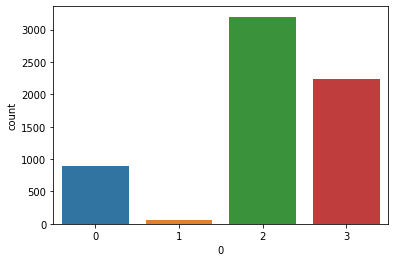

In [7]:
##### Print the target class into countplot #####
sns.countplot(pd.DataFrame(y)[0])
plt.show()

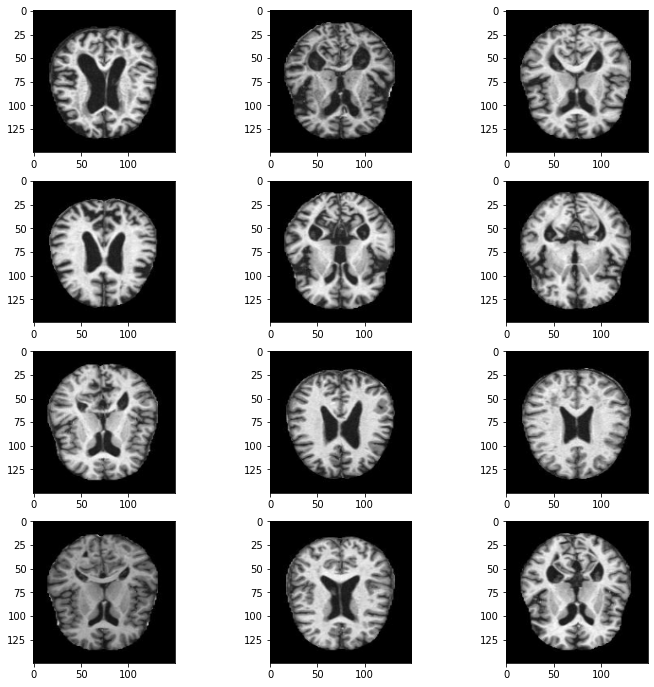

In [8]:
##### Plot 3 images from each folders #####
_DIRECTORY   = '/content/Alzheimer_s _Dataset'
_CATEGORIES  = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
plot_dt_dic = {}

for each_category_ in _CATEGORIES:
  folder_path_ = os.path.join(_DIRECTORY, each_category_)
  count_, list_ = 0, []
  for all_images_ in os.listdir(folder_path_):
    if count_ < 3:
      each_image_directory = os.path.join(folder_path_, all_images_)
      ##### In order to make the computation cost minimised the image size is = (100, 100) #####
      list_.append(cv2.resize(cv2.imread(each_image_directory), (150, 150)))
      count_ = count_ + 1
    else:
      break
  plot_dt_dic[each_category_] = list_

##### Plot the iamges #####
fig, ax = plt.subplots(4, 3, figsize = (12, 12))
ax[0, 0].imshow(plot_dt_dic['MildDemented'][0])
ax[0, 1].imshow(plot_dt_dic['MildDemented'][1])
ax[0, 2].imshow(plot_dt_dic['MildDemented'][2])

ax[1, 0].imshow(plot_dt_dic['ModerateDemented'][0])
ax[1, 1].imshow(plot_dt_dic['ModerateDemented'][1])
ax[1, 2].imshow(plot_dt_dic['ModerateDemented'][2])

ax[2, 0].imshow(plot_dt_dic['NonDemented'][0])
ax[2, 1].imshow(plot_dt_dic['NonDemented'][1])
ax[2, 2].imshow(plot_dt_dic['NonDemented'][2])

ax[3, 0].imshow(plot_dt_dic['VeryMildDemented'][0])
ax[3, 1].imshow(plot_dt_dic['VeryMildDemented'][1])
ax[3, 2].imshow(plot_dt_dic['VeryMildDemented'][2])
plt.show()

In [9]:
##### Normalized the independent features #####
def Normalized(independent):
  if type('independent') != str:
     raise Exception('Should be used List.\n')
  else:
    return independent/255

##### Call the Normalized function #####
try:
  X_normalised = Normalized(X)
except Exception as e:
  print(e.with_traceback)
except:
  print('Normalization is done.\n'.title())

Split the dataset into train and test

In [10]:
##### Split the dataset into train and test #####
print('The shape of X is = {}'.format(X_normalised.shape),'\n')
print('The shape of y is = {}'.format(y.shape),'\n')
print('*'*120,'\n')

X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size = 0.30, random_state = 42, shuffle = True)

print('The shape of X_train is = {} '.format(X_train.shape),'\n'.capitalize())
print('The shape of X_test  is = {} '.format(X_test.shape),'\n'.capitalize())
print('The shape of y_train is = {} '.format(y_train.shape),'\n'.capitalize())
print('The shape of y_test  is = {} '.format(y_test.shape),'\n'.capitalize())

The shape of X is = (6400, 128, 128, 3) 

The shape of y is = (6400,) 

************************************************************************************************************************ 

The shape of X_train is = (4480, 128, 128, 3)  

The shape of X_test  is = (1920, 128, 128, 3)  

The shape of y_train is = (4480,)  

The shape of y_test  is = (1920,)  



Build Own CNN Architecture to evaluate the performance.

In [11]:
##### Create a sequential model #####
model = Sequential()

##### Create first Convolutional Layer with 32 kernels #####
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1),\
                 padding = 'valid', activation = 'relu', kernel_initializer = 'he_normal', input_shape = X_normalised.shape[1:]))

##### Use the MaxPooling Layer with Strides = 2, shape = (2, 2) #####
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))

##### Create second Convolutional Layer with 32 kernels #####
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1),\
                 padding = 'valid', activation = 'relu' , kernel_initializer = 'he_normal'))

##### Use the MaxPooling Layer with Strides = 2, shape = (2, 2) #####
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))


##### Create third and last Convolutional Layer with 16 filters #####
model.add(Conv2D(filters = 16, kernel_size = (3, 3), strides = (1, 1),\
                 padding = 'valid', activation = 'relu', kernel_initializer = 'he_normal'))

##### Use the MaxPooling Layer with shape (2, 2) and Strides = (2, 2) #####
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))

##### Flatten the Convolutional Layer #####
model.add(Flatten())

##### Create first hidden layer with 256 neurons with L2 regularization #####
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

##### Use the Dropout Layer with the p value = 0.5 #####
model.add(Dropout(0.5))

##### Create second hidden layer with 128 neurons #####
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

##### Use the Dropout Layer with the p value = 0.5 #####
model.add(Dropout(0.6))

##### Create an output layer with softmax #####
model.add(Dense(units = 4, activation = 'softmax'))

##### Compile the model #####
model.compile(optimizer = 'adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

##### Show the model summary #####
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0

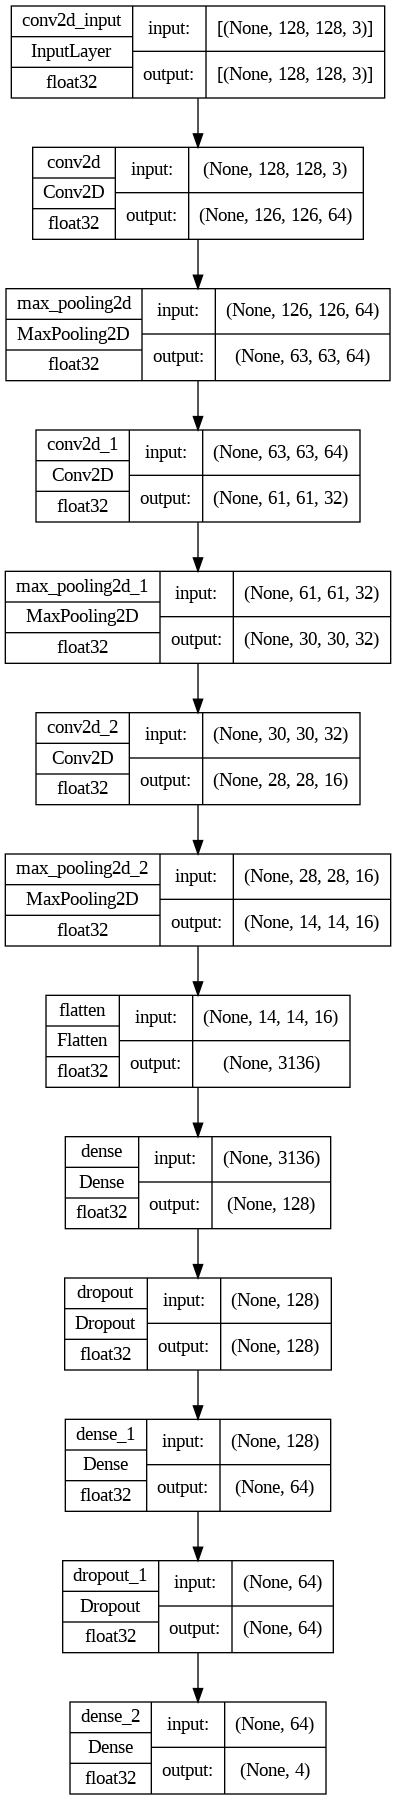

In [12]:
##### Plot the model ######
plot_model(model, show_shapes = True, show_dtype = True, show_layer_names = True)

In [13]:
##### Fit the model and check the performance with batch ize = 64#####
history_ = model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 100, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
70/70 [==============================] - 6s 54ms/step - loss: 2.1638 - accuracy: 0.4415 - val_loss: 1.7860 - val_accuracy: 0.4948
Epoch 2/100
70/70 [==============================] - 3s 45ms/step - loss: 1.6049 - accuracy: 0.4792 - val_loss: 1.3888 - val_accuracy: 0.4948
Epoch 3/100
70/70 [==============================] - 3s 45ms/step - loss: 1.3074 - accuracy: 0.5094 - val_loss: 1.1733 - val_accuracy: 0.5385
Epoch 4/100
70/70 [==============================] - 3s 45ms/step - loss: 1.1241 - accuracy: 0.5375 - val_loss: 1.0501 - val_accuracy: 0.5562
Epoch 5/100
70/70 [==============================] - 3s 45ms/step - loss: 1.0358 - accuracy: 0.5625 - val_loss: 0.9735 - val_accuracy: 0.5760
Epoch 6/100
70/70 [==============================] - 3s 45ms/step - loss: 0.9511 - accuracy: 0.5835 - val_loss: 0.9138 - val_accuracy: 0.5818
Epoch 7/100
70/70 [==============================] - 3s 45ms/step - loss: 0.8851 - accuracy: 0.6136 - val_loss: 0.8627 - val_accuracy: 0.6026
Epoch 

In [14]:
##### Show the performance of this model #####
predicted_ = model.predict(X_test)
predicted_ = np.argmax(predicted_, axis = 1)

print('\nThe accuracy of this Neural Network is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision of this Neural Network is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The reacll of this Neural Network is    = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is  = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n\n'))

dataFrame_ = {
    'Accuracy Score' : [accuracy_score(predicted_, y_test)],
    'Precision Score': [precision_score(predicted_, y_test, average = 'macro')],
    'Recall Score'   : [recall_score(predicted_, y_test, average = 'macro')],
    'F1 Score'       : [f1_score(predicted_, y_test, average = 'macro')]
}
df = pd.DataFrame(dataFrame_, index = ['OWN ARCHITECTURE'])

df.head()

60/60 [==============================] - 1s 8ms/step

The accuracy of this Neural Network is  = 0.9578125 
The precision of this Neural Network is = 0.9107746231907167 
The reacll of this Neural Network is    = 0.9729590422571439 
The f1_score of this Neural Network is  = 0.938269896674567 


,Accuracy Score,Precision Score,Recall Score,F1 Score
OWN ARCHITECTURE,0.957812,0.910775,0.972959,0.93827


In [15]:
##### Show the classification report of this model #####
print(classification_report(predicted_, y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       265
           1       0.79      1.00      0.88        15
           2       0.99      0.94      0.97      1005
           3       0.92      0.98      0.95       635

    accuracy                           0.96      1920
   macro avg       0.91      0.97      0.94      1920
weighted avg       0.96      0.96      0.96      1920



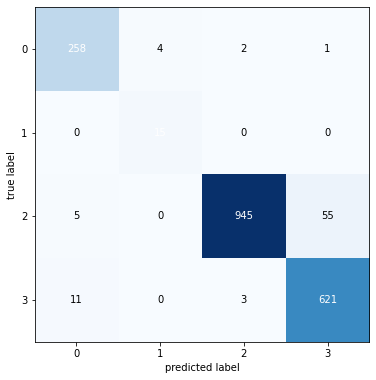

In [16]:
##### Show the confusion matrix #####
from mlxtend.plotting import plot_confusion_matrix
confusion_matrix_ = confusion_matrix(predicted_, y_test)
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix_, figsize=(6, 7))
plt.show()

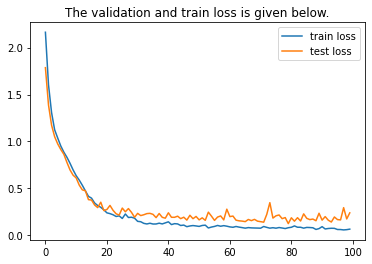

************************************************************************************************************************ 



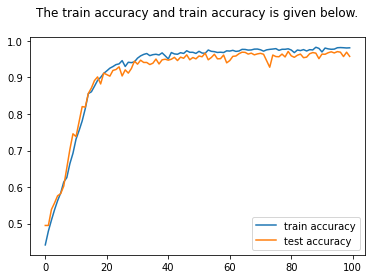

In [17]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss is given below.')
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy is given below.\n')
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

Use The StratifiedKFold - 5 to evaluate the model.

In [18]:
##### Call the StratifiedKFold -3 function #####
StratifiedKFold_ = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)
##### Declare the evaluation matrix #####
count_, accuracy_score_, precision_score_, recall_score_, f1_score_, history_list = 1, [], [], [], [], []
##### Run the KFold with the desired parameters #####
for train_index, test_index in StratifiedKFold_.split(X_normalised, y):

  print('# of Cross Validation {} is running.\n'.format(count_))
  
  ##### Split the dataset into train and test #####
  X_train, X_test = X_normalised[train_index], X_normalised[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  ##### Fit the model that I initialized before #####
  history_ = model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 100, validation_data = (X_test, y_test), verbose = 1)

  history_list.append(history_)
  
  ##### Predict the model and store all evalution matrix into the list #####
  predicted_ = model.predict(X_test)
  predicted_ = np.argmax(predicted_, axis = 1)

  print('\nThe accuracy of this Neural Network is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
  print('The precision of this Neural Network is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
  print('The reacll of this Neural Network is    = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
  print('The f1_score of this Neural Network is  = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n\n'))

  accuracy_score_.append(accuracy_score(predicted_, y_test))
  precision_score_.append(precision_score(predicted_, y_test, average = 'macro'))
  recall_score_.append(recall_score(predicted_, y_test, average = 'macro'))
  f1_score_.append(f1_score(predicted_, y_test, average = 'macro'))

  count_+= 1

# of Cross Validation 1 is running.

Epoch 1/100
67/67 [==============================] - 4s 59ms/step - loss: 0.1519 - accuracy: 0.9552 - val_loss: 0.0695 - val_accuracy: 0.9845
Epoch 2/100
67/67 [==============================] - 3s 47ms/step - loss: 0.1184 - accuracy: 0.9672 - val_loss: 0.0429 - val_accuracy: 0.9906
Epoch 3/100
67/67 [==============================] - 3s 47ms/step - loss: 0.1216 - accuracy: 0.9681 - val_loss: 0.0434 - val_accuracy: 0.9906
Epoch 4/100
67/67 [==============================] - 3s 47ms/step - loss: 0.0931 - accuracy: 0.9716 - val_loss: 0.0556 - val_accuracy: 0.9892
Epoch 5/100
67/67 [==============================] - 3s 47ms/step - loss: 0.0819 - accuracy: 0.9766 - val_loss: 0.0428 - val_accuracy: 0.9920
Epoch 6/100
67/67 [==============================] - 3s 47ms/step - loss: 0.0872 - accuracy: 0.9754 - val_loss: 0.0569 - val_accuracy: 0.9902
Epoch 7/100
67/67 [==============================] - 3s 47ms/step - loss: 0.0788 - accuracy: 0.9794 - val_loss:

In [19]:
##### print the list of all performance #####
print('The list of accuracy score is  = {}'.format(accuracy_score_),'\n')
print('The list of precision score is = {}'.format(precision_score_),'\n')
print('The list of recall score is    = {}'.format(recall_score_),'\n')
print('The list of F1 score model is  = {}'.format(f1_score_),'\n')

print('*'*120,'\n')

print('The mean accuracy score is  = {}'.format(np.array(accuracy_score_).mean()),'\n')
print('The mean precision score is = {}'.format(np.array(precision_score_).mean()),'\n')
print('The mean recall score is    = {}'.format(np.array(recall_score_).mean()),'\n')
print('The mean F1 score model is  = {}'.format(np.array(f1_score_).mean()),'\n')


dataFrame_ = {
    'Accuracy Score' : [np.array(accuracy_score_).mean()],
    'Precision Score': [np.array(precision_score_).mean()],
    'Recall Score'   : [np.array(recall_score_).mean()],
    'F1 Score'       : [np.array(f1_score_).mean()]
}
df_KFold = pd.DataFrame(dataFrame_, index = ['OWN ARCHITECTURE - KFold'])
df = pd.concat([df, df_KFold], axis = 0)
df.head()

The list of accuracy score is  = [0.9920337394564198, 0.9981247069854665, 0.9976558837318331] 

The list of precision score is = [0.9803692536567586, 0.9983601644252732, 0.9980231262212782] 

The list of recall score is    = [0.9948073972593136, 0.9981625444851775, 0.9985287226418216] 

The list of F1 score model is  = [0.9874332338357431, 0.9982606886167638, 0.9982751079700483] 

************************************************************************************************************************ 

The mean accuracy score is  = 0.9959381100579064 

The mean precision score is = 0.9922508481011034 

The mean recall score is    = 0.9971662214621042 

The mean F1 score model is  = 0.9946563434741851 



,Accuracy Score,Precision Score,Recall Score,F1 Score
OWN ARCHITECTURE,0.957812,0.910775,0.972959,0.938270
OWN ARCHITECTURE - KFold,0.995938,0.992251,0.997166,0.994656


Epoch number: 1


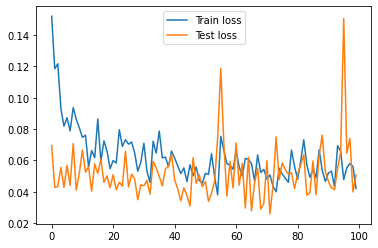

Epoch number: 2


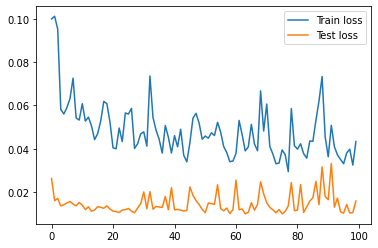

Epoch number: 3


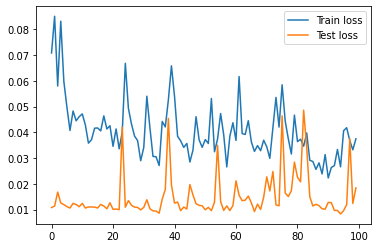

In [20]:
##### Plot the history of loss in each epoch #####

for index, history in enumerate(history_list):
  print(f'Epoch number: {index + 1}')
  plt.plot(history.history['loss'], label = 'Train loss')
  plt.plot(history.history['val_loss'], label = 'Test loss')
  plt.legend()
  plt.show()

Epoch number: 1


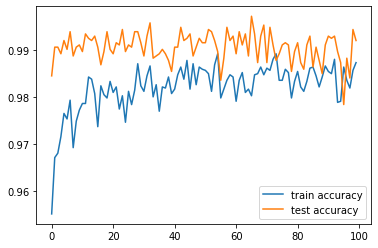

Epoch number: 2


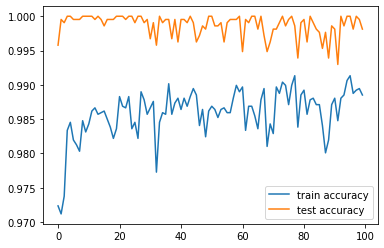

Epoch number: 3


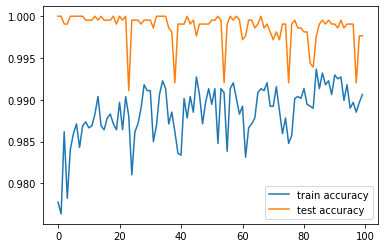

In [21]:
##### Plot the history of accuracy in each epoch #####

for index, history in enumerate(history_list):
  print(f'Epoch number: {index + 1}')
  plt.plot(history.history['accuracy'], label = 'train accuracy')
  plt.plot(history.history['val_accuracy'], label = 'test accuracy')
  plt.legend()
  plt.show()

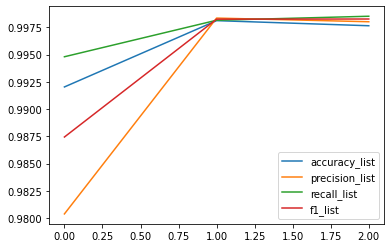

In [22]:
##### Plot the performance matrix #####
plt.plot(accuracy_score_, label = 'accuracy_list')
plt.plot(precision_score_, label = 'precision_list')
plt.plot(recall_score_, label = 'recall_list')
plt.plot(f1_score_, label = 'f1_list')
plt.legend()
plt.show()

Use VGG16 Architecture to evaluate the model

In [23]:
##### Import VGG16 model #####
from tensorflow.keras.applications import VGG16
VGG16_ = VGG16(include_top = False, weights = 'imagenet',\
               input_shape = X_normalised.shape[1:], classes = 4)

##### Make the traibable parameters False #####
VGG16_.trainable = False

##### Show the model summary #####
VGG16_.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

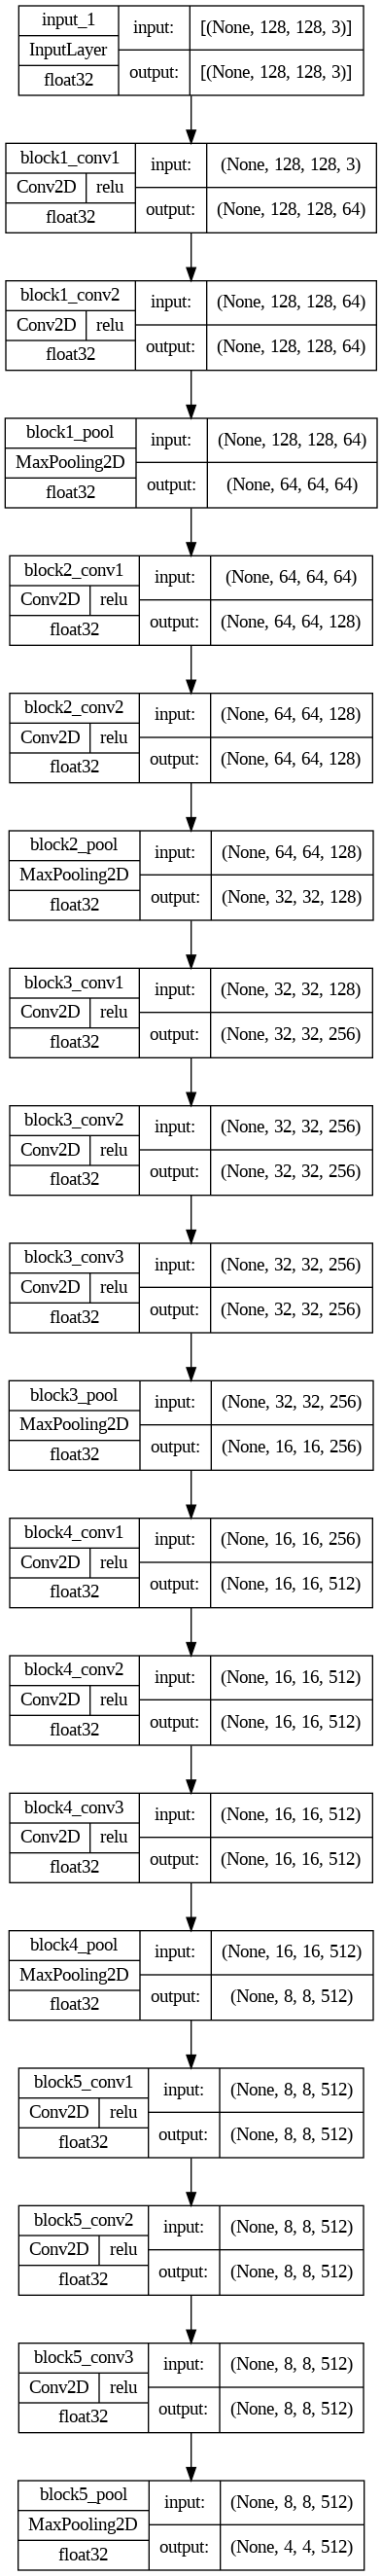

In [24]:
##### Plot the VGG16 model #####
plot_model(VGG16_, show_shapes = True, show_dtype = True,\
           show_layer_names = True, show_layer_activations = True)

In [25]:
##### Create the Sequential model #####
model = Sequential()

##### add this VGG16_ to this sequential model #####
model.add(VGG16_)

##### Flatten the Convolutional Layer #####
model.add(Flatten())

##### Create first hidden layer with 256 neurons with L2 regularization #####
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

# ##### Use the Dropout Layer with the p value = 0.5 #####
# model.add(Dropout(0.5))

##### Create second hidden layer with 128 neurons #####
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

##### Use the Dropout Layer with the p value = 0.5 #####
model.add(Dropout(0.4))

##### Create an output layer with softmax #####
model.add(Dense(units = 4, activation = 'softmax'))

##### Compile the model #####
model.compile(optimizer = Adam(learning_rate = 0.001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

##### Show the model summary #####
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1048704   
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 15,771,908
Trainable params: 1,057,220
N

In [26]:
##### Fit the model and check the performance #####
history_ = model.fit(x = X_train, y = y_train, batch_size = 128, epochs = 50, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/50
34/34 [==============================] - 19s 452ms/step - loss: 2.1993 - accuracy: 0.4781 - val_loss: 1.8338 - val_accuracy: 0.5626
Epoch 2/50
34/34 [==============================] - 10s 297ms/step - loss: 1.7358 - accuracy: 0.5463 - val_loss: 1.5531 - val_accuracy: 0.5870
Epoch 3/50
34/34 [==============================] - 10s 296ms/step - loss: 1.4985 - accuracy: 0.5664 - val_loss: 1.3441 - val_accuracy: 0.6123
Epoch 4/50
34/34 [==============================] - 10s 296ms/step - loss: 1.2872 - accuracy: 0.6091 - val_loss: 1.1753 - val_accuracy: 0.6254
Epoch 5/50
34/34 [==============================] - 10s 294ms/step - loss: 1.1309 - accuracy: 0.6553 - val_loss: 1.0816 - val_accuracy: 0.6324
Epoch 6/50
34/34 [==============================] - 10s 294ms/step - loss: 1.0522 - accuracy: 0.6452 - val_loss: 0.9680 - val_accuracy: 0.6667
Epoch 7/50
34/34 [==============================] - 10s 293ms/step - loss: 0.9591 - accuracy: 0.6672 - val_loss: 0.9110 - val_accuracy: 0.6774

In [27]:
##### Show the performance of this model #####
predicted_ = model.predict(X_test)
predicted_ = np.argmax(predicted_, axis = 1)

print('\nThe accuracy of this Neural Network is= {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision of this Neural Network is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The reacll of this Neural Network is    = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is  = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n\n'))

dataFrame_ = {
    'Accuracy Score' : [accuracy_score(predicted_, y_test)],
    'Precision Score': [precision_score(predicted_, y_test, average = 'macro')],
    'Recall Score'   : [recall_score(predicted_, y_test, average = 'macro')],
    'F1 Score'       : [f1_score(predicted_, y_test, average = 'macro')]
}
df_VGG16 = pd.DataFrame(dataFrame_, index = ['VGG16 ARCHITECTURE'])
df = pd.concat([df, df_VGG16], axis = 0)

df.head()

67/67 [==============================] - 6s 67ms/step

The accuracy of this Neural Network is  = 0.8776371308016878 
The precision of this Neural Network is = 0.8456490868045687 
The reacll of this Neural Network is    = 0.9127411243892811 
The f1_score of this Neural Network is  = 0.8724907526865912 


,Accuracy Score,Precision Score,Recall Score,F1 Score
OWN ARCHITECTURE,0.957812,0.910775,0.972959,0.938270
OWN ARCHITECTURE - KFold,0.995938,0.992251,0.997166,0.994656
VGG16 ARCHITECTURE,0.877637,0.845649,0.912741,0.872491


In [28]:
##### Show the classification report of this model #####
print(classification_report(predicted_, y_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87       272
           1       0.76      1.00      0.86        16
           2       0.85      0.95      0.90       958
           3       0.93      0.78      0.85       887

    accuracy                           0.88      2133
   macro avg       0.85      0.91      0.87      2133
weighted avg       0.88      0.88      0.88      2133



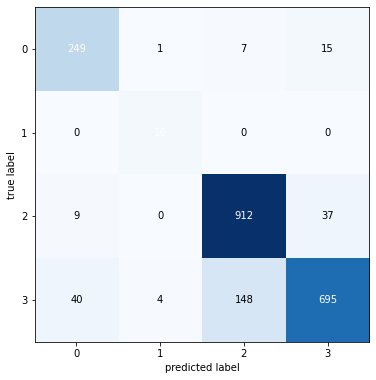

In [29]:
##### Show the confusion matrix #####
from mlxtend.plotting import plot_confusion_matrix
confusion_matrix_ = confusion_matrix(predicted_, y_test)
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix_, figsize=(6, 7))
plt.show()

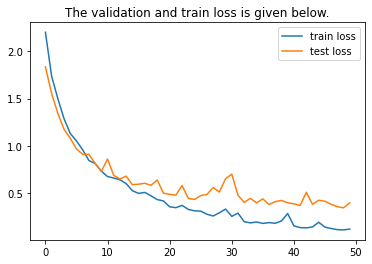

************************************************************************************************************************ 



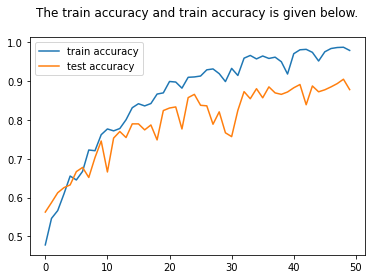

In [30]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss is given below.')
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy is given below.\n')
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

ResNet Architecture used to evaluate the model

In [31]:
##### Import the ResNet50 #####
from tensorflow.keras.applications import ResNet50
##### Call the ResNet50 #####
ResNet_ = ResNet50(weights = 'imagenet', include_top = False, classes = 4, input_shape = X_normalised.shape[1:])

##### Set the trainable parameter False #####
ResNet_.trainable = False

##### Plot the summary #####
ResNet_.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [32]:
##### Create a Sequential model #####
model = Sequential()

##### Add this ResNet archtecture to the model #####
model.add(ResNet_)

##### Flatten the Convolutional Layer #####
model.add(Flatten())

##### Create first hidden layer with 256 neurons with L2 regularization #####
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

##### Use the Dropout Layer with the p value = 0.5 #####
model.add(Dropout(0.5))

##### Create second hidden layer with 128 neurons #####
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))

##### Use the Dropout Layer with the p value = 0.5 #####
model.add(Dropout(0.6))

##### Create an output layer with softmax #####
model.add(Dense(units = 4, activation = 'softmax'))

##### Compile the model #####
model.compile(optimizer = Adam(learning_rate = 0.001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

##### Show the model summary #####
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4194432   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 4)                

In [33]:
##### Fit the model and check the performance #####
history_ = model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 50, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/50
67/67 [==============================] - 12s 130ms/step - loss: 1.2775 - accuracy: 0.4111 - val_loss: 1.0428 - val_accuracy: 0.5002
Epoch 2/50
67/67 [==============================] - 7s 98ms/step - loss: 1.1229 - accuracy: 0.4650 - val_loss: 1.0346 - val_accuracy: 0.5002
Epoch 3/50
67/67 [==============================] - 7s 99ms/step - loss: 1.0721 - accuracy: 0.4800 - val_loss: 1.0134 - val_accuracy: 0.5002
Epoch 4/50
67/67 [==============================] - 7s 99ms/step - loss: 1.0560 - accuracy: 0.4905 - val_loss: 1.0090 - val_accuracy: 0.5002
Epoch 5/50
67/67 [==============================] - 7s 100ms/step - loss: 1.0367 - accuracy: 0.4975 - val_loss: 1.0041 - val_accuracy: 0.5002
Epoch 6/50
67/67 [==============================] - 7s 99ms/step - loss: 1.0326 - accuracy: 0.4936 - val_loss: 1.0207 - val_accuracy: 0.5002
Epoch 7/50
67/67 [==============================] - 7s 99ms/step - loss: 1.0166 - accuracy: 0.5001 - val_loss: 0.9907 - val_accuracy: 0.5002
Epoch 8/50

In [34]:
##### Show the performance of this model #####
predicted_ = model.predict(X_test)
predicted_ = np.argmax(predicted_, axis = 1)

print('\nThe accuracy of this Neural Network is= {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision of this Neural Network is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The reacll of this Neural Network is    = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is  = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n\n'))

dataFrame_ = {
    'Accuracy Score' : [accuracy_score(predicted_, y_test)],
    'Precision Score': [precision_score(predicted_, y_test, average = 'macro')],
    'Recall Score'   : [recall_score(predicted_, y_test, average = 'macro')],
    'F1 Score'       : [f1_score(predicted_, y_test, average = 'macro')]
}
df_ResNet = pd.DataFrame(dataFrame_, index = ['ResNet50 ARCHITECTURE'])
df = pd.concat([df, df_ResNet], axis = 0)

df.head()

67/67 [==============================] - 4s 36ms/step

The accuracy of this Neural Network is  = 0.5002344116268167 
The precision of this Neural Network is = 0.25 
The reacll of this Neural Network is    = 0.12505860290670417 
The f1_score of this Neural Network is  = 0.16671875 


,Accuracy Score,Precision Score,Recall Score,F1 Score
OWN ARCHITECTURE,0.957812,0.910775,0.972959,0.938270
OWN ARCHITECTURE - KFold,0.995938,0.992251,0.997166,0.994656
VGG16 ARCHITECTURE,0.877637,0.845649,0.912741,0.872491
ResNet50 ARCHITECTURE,0.500234,0.250000,0.125059,0.166719


In [35]:
##### Show the classification report of this model #####
print(classification_report(predicted_, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67      2133
           3       0.00      0.00      0.00         0

    accuracy                           0.50      2133
   macro avg       0.25      0.13      0.17      2133
weighted avg       1.00      0.50      0.67      2133



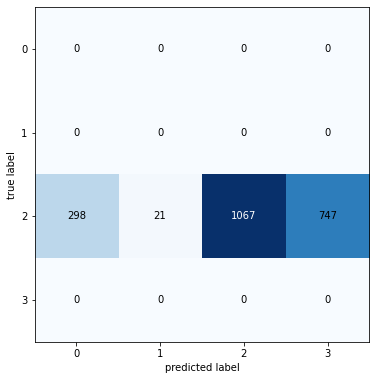

In [36]:
##### Show the confusion matrix #####
from mlxtend.plotting import plot_confusion_matrix
confusion_matrix_ = confusion_matrix(predicted_, y_test)
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix_, figsize=(6, 7))
plt.show()

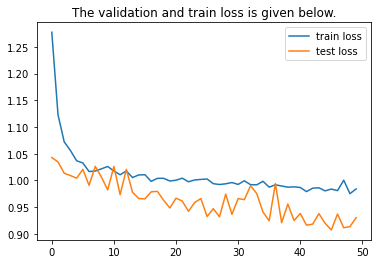

************************************************************************************************************************ 



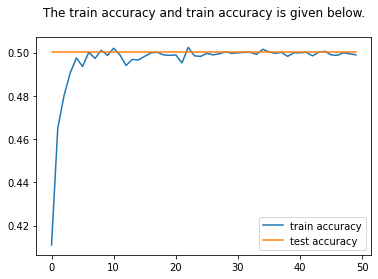

In [37]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss is given below.')
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy is given below.\n')
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

InceptionNetV2 transfer Learning Model and check the evaluation model

In [38]:
##### import the inceptionNetV2 #####
from tensorflow.keras.applications import InceptionResNetV2
inceptionNet = InceptionResNetV2(include_top = False, weights = 'imagenet',\
                                 input_shape = X_normalised.shape[1:], classes = 4)

##### Make the InceptionResNetV2 trainable = False #####
inceptionNet.trainable = False

##### Show the summary #####
inceptionNet.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 63, 63, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                

In [39]:
##### Create the Sequential model #####
model = Sequential()

##### Add this into the model sequential #####
model.add(inceptionNet)

##### Flatten the Convolutional Layer #####
model.add(Flatten())

##### Create first hidden layer with 256 neurons with L2 regularization #####
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

##### Use the Dropout Layer with the p value = 0.5 #####
model.add(Dropout(0.4))

##### Create second hidden layer with 128 neurons #####
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))

##### Use the Dropout Layer with the p value = 0.5 #####
model.add(Dropout(0.3))

##### Create an output layer with softmax #####
model.add(Dense(units = 4, activation = 'softmax'))

##### Compile the model #####
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

##### Show the model summary #####
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 2, 2, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 6144)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               786560    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                      

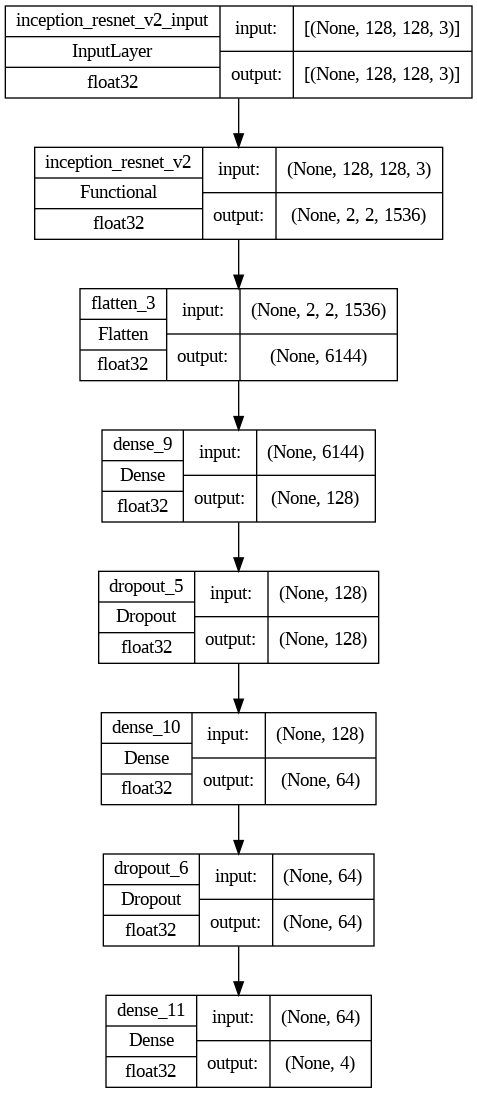

In [40]:
##### plot the InceptionNetV2 #####
plot_model(model, show_shapes = True, show_dtype = True)

In [41]:
##### Fit the model and check the performance #####
history_ = model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 50, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/50
67/67 [==============================] - 25s 222ms/step - loss: 1.4775 - accuracy: 0.4354 - val_loss: 1.0309 - val_accuracy: 0.5096
Epoch 2/50
67/67 [==============================] - 10s 157ms/step - loss: 1.1016 - accuracy: 0.4772 - val_loss: 1.0048 - val_accuracy: 0.5434
Epoch 3/50
67/67 [==============================] - 10s 157ms/step - loss: 1.0789 - accuracy: 0.4863 - val_loss: 0.9886 - val_accuracy: 0.5631
Epoch 4/50
67/67 [==============================] - 10s 157ms/step - loss: 1.0464 - accuracy: 0.5064 - val_loss: 0.9393 - val_accuracy: 0.5476
Epoch 5/50
67/67 [==============================] - 10s 155ms/step - loss: 1.0206 - accuracy: 0.5144 - val_loss: 0.9406 - val_accuracy: 0.5748
Epoch 6/50
67/67 [==============================] - 10s 154ms/step - loss: 1.0113 - accuracy: 0.5280 - val_loss: 0.9388 - val_accuracy: 0.5738
Epoch 7/50
67/67 [==============================] - 10s 154ms/step - loss: 0.9946 - accuracy: 0.5268 - val_loss: 0.9010 - val_accuracy: 0.5682

In [42]:
##### Show the performance of this model #####
predicted_ = model.predict(X_test)
predicted_ = np.argmax(predicted_, axis = 1)

print('\nThe accuracy of this Neural Network is= {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision of this Neural Network is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The reacll of this Neural Network is    = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is  = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n\n'))

dataFrame_ = {
    'Accuracy Score' : [accuracy_score(predicted_, y_test)],
    'Precision Score': [precision_score(predicted_, y_test, average = 'macro')],
    'Recall Score'   : [recall_score(predicted_, y_test, average = 'macro')],
    'F1 Score'       : [f1_score(predicted_, y_test, average = 'macro')]
}
df_ResNet = pd.DataFrame(dataFrame_, index = ['InceptionNetV2 ARCHITECTURE'])
df = pd.concat([df, df_ResNet], axis = 0)

df.head()

67/67 [==============================] - 7s 56ms/step

The accuracy of this Neural Network is  = 0.6999531176746366 
The precision of this Neural Network is = 0.482195358152553 
The reacll of this Neural Network is    = 0.5206891152442341 
The f1_score of this Neural Network is  = 0.489769728771281 


,Accuracy Score,Precision Score,Recall Score,F1 Score
OWN ARCHITECTURE,0.957812,0.910775,0.972959,0.938270
OWN ARCHITECTURE - KFold,0.995938,0.992251,0.997166,0.994656
VGG16 ARCHITECTURE,0.877637,0.845649,0.912741,0.872491
ResNet50 ARCHITECTURE,0.500234,0.250000,0.125059,0.166719
InceptionNetV2 ARCHITECTURE,0.699953,0.482195,0.520689,0.489770


In [43]:
##### Show the classification report of this model #####
print(classification_report(predicted_, y_test))

              precision    recall  f1-score   support

           0       0.41      0.68      0.51       182
           1       0.00      0.00      0.00         0
           2       0.74      0.82      0.78       965
           3       0.77      0.59      0.67       986

    accuracy                           0.70      2133
   macro avg       0.48      0.52      0.49      2133
weighted avg       0.73      0.70      0.70      2133



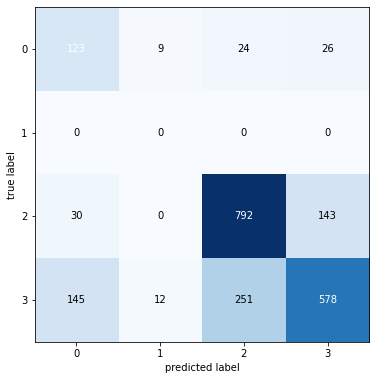

In [44]:
##### Show the confusion matrix #####
from mlxtend.plotting import plot_confusion_matrix
confusion_matrix_ = confusion_matrix(predicted_, y_test)
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix_, figsize=(6, 7))
plt.show()

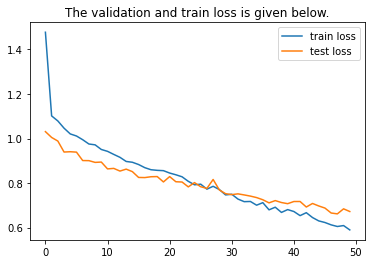

************************************************************************************************************************ 



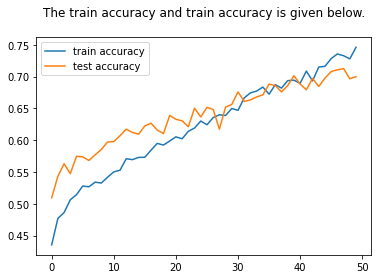

In [45]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss is given below.')
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy is given below.\n')
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

In [46]:
df.head()

,Accuracy Score,Precision Score,Recall Score,F1 Score
OWN ARCHITECTURE,0.957812,0.910775,0.972959,0.938270
OWN ARCHITECTURE - KFold,0.995938,0.992251,0.997166,0.994656
VGG16 ARCHITECTURE,0.877637,0.845649,0.912741,0.872491
ResNet50 ARCHITECTURE,0.500234,0.250000,0.125059,0.166719
InceptionNetV2 ARCHITECTURE,0.699953,0.482195,0.520689,0.489770


In [47]:
##### Analysis #####
print('Among them, My architecture is the best to evaluate the model.')

Among them, My architecture is the best to evaluate the model.


Create the model with my architecture in CNN - WITH BALANCED CLASS WEIGHTS and evaluate the performace again

In [58]:
##### Call the class_weight #####
from sklearn.utils import class_weight
# Calculate weights using sklearn
sklearn_weights =  class_weight.compute_class_weight(
       class_weight='balanced',
        classes=np.unique(y_train), 
        y=y_train)

print("Weights is :", sklearn_weights,'\n\n')

# Transform array to dictionary
sklearn_weights = dict(enumerate(sklearn_weights))
print("Weights is :", sklearn_weights)

Weights is : [ 1.78386288 24.80813953  0.50011721  0.714501  ] 


Weights is : {0: 1.7838628762541806, 1: 24.808139534883722, 2: 0.5001172058134083, 3: 0.7145010046885466}


In [59]:
##### Create a sequential model #####
model = Sequential()

##### Create first Convolutional Layer with 32 kernels #####
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1),\
                 padding = 'valid', activation = 'relu', kernel_initializer = 'he_normal', input_shape = X_normalised.shape[1:]))

##### Use the MaxPooling Layer with Strides = 2, shape = (2, 2) #####
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))

##### Create second Convolutional Layer with 32 kernels #####
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1),\
                 padding = 'valid', activation = 'relu' , kernel_initializer = 'he_normal'))

##### Use the MaxPooling Layer with Strides = 2, shape = (2, 2) #####
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))


##### Create third and last Convolutional Layer with 16 filters #####
model.add(Conv2D(filters = 16, kernel_size = (3, 3), strides = (1, 1),\
                 padding = 'valid', activation = 'relu', kernel_initializer = 'he_normal'))

##### Use the MaxPooling Layer with shape (2, 2) and Strides = (2, 2) #####
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))

##### Flatten the Convolutional Layer #####
model.add(Flatten())

##### Create first hidden layer with 256 neurons with L2 regularization #####
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

##### Use the Dropout Layer with the p value = 0.5 #####
model.add(Dropout(0.5))

##### Create second hidden layer with 128 neurons #####
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

##### Use the Dropout Layer with the p value = 0.5 #####
model.add(Dropout(0.6))

##### Create an output layer with softmax #####
model.add(Dense(units = 4, activation = 'softmax'))

##### Compile the model #####
model.compile(optimizer = 'adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

##### Show the model summary #####
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_209 (Conv2D)         (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_210 (Conv2D)         (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_211 (Conv2D)         (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)      

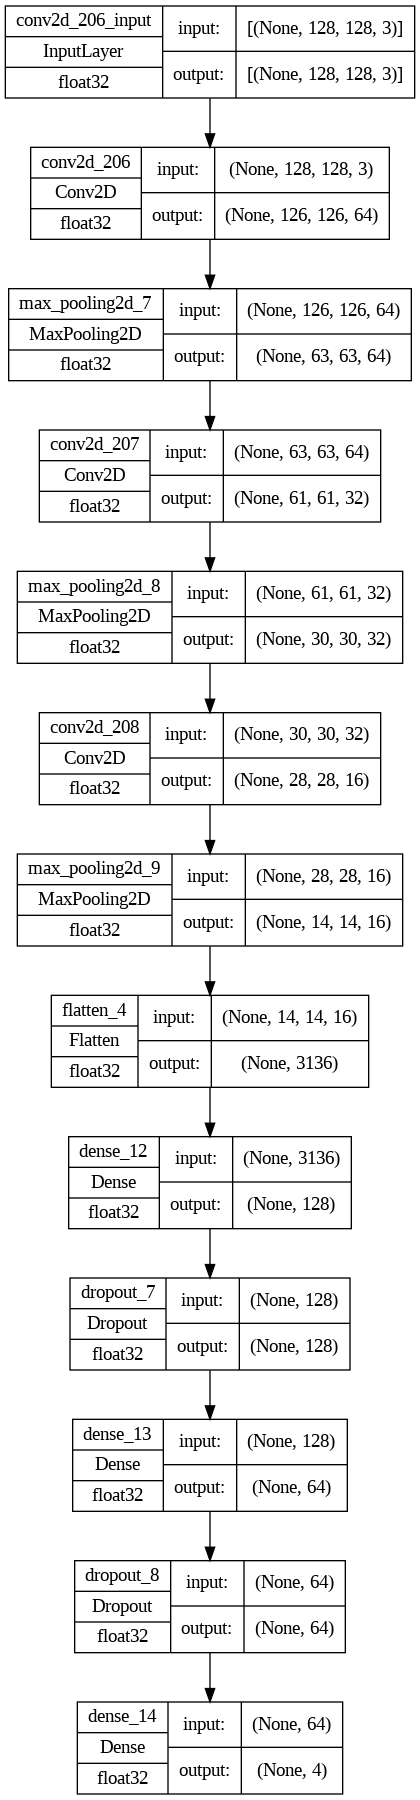

In [49]:
##### Plot the model ######
plot_model(model, show_shapes = True, show_dtype = True, show_layer_names = True)

In [60]:
##### Fit the model and check the performance with batch ize = 64#####
history_ = model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 100, validation_data = (X_test, y_test), verbose = 1, class_weight=sklearn_weights)

Epoch 1/100
67/67 [==============================] - 4s 54ms/step - loss: 2.4129 - accuracy: 0.2655 - val_loss: 2.0985 - val_accuracy: 0.0886
Epoch 2/100
67/67 [==============================] - 3s 47ms/step - loss: 1.9377 - accuracy: 0.2217 - val_loss: 1.7007 - val_accuracy: 0.5002
Epoch 3/100
67/67 [==============================] - 3s 47ms/step - loss: 1.6955 - accuracy: 0.2566 - val_loss: 1.6087 - val_accuracy: 0.3760
Epoch 4/100
67/67 [==============================] - 3s 47ms/step - loss: 1.5792 - accuracy: 0.3119 - val_loss: 1.5482 - val_accuracy: 0.0253
Epoch 5/100
67/67 [==============================] - 3s 47ms/step - loss: 1.5156 - accuracy: 0.2133 - val_loss: 1.5062 - val_accuracy: 0.0098
Epoch 6/100
67/67 [==============================] - 3s 47ms/step - loss: 1.4724 - accuracy: 0.1312 - val_loss: 1.4526 - val_accuracy: 0.4482
Epoch 7/100
67/67 [==============================] - 3s 47ms/step - loss: 1.4530 - accuracy: 0.1193 - val_loss: 1.4613 - val_accuracy: 0.0244
Epoch 

Create the model for the single input and save the model for the further used.

In [61]:
##### Show the performance of this model #####
predicted_ = model.predict(X_test)
predicted_ = np.argmax(predicted_, axis = 1)

print('\nThe accuracy of this Neural Network is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision of this Neural Network is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The reacll of this Neural Network is    = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is  = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n\n'))

67/67 [==============================] - 1s 8ms/step

The accuracy of this Neural Network is  = 0.93342709798406 
The precision of this Neural Network is = 0.9360104939444369 
The reacll of this Neural Network is    = 0.9557390516259713 
The f1_score of this Neural Network is  = 0.9445050616865298 


In [62]:
##### Show the classification report of this model #####
print(classification_report(predicted_, y_test))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       259
           1       1.00      1.00      1.00        21
           2       0.95      0.96      0.95      1056
           3       0.95      0.89      0.91       797

    accuracy                           0.93      2133
   macro avg       0.94      0.96      0.94      2133
weighted avg       0.94      0.93      0.93      2133



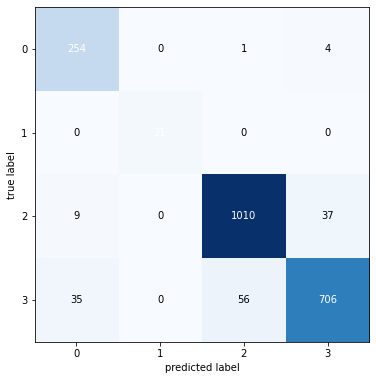

In [63]:
##### Show the confusion matrix #####
from mlxtend.plotting import plot_confusion_matrix
confusion_matrix_ = confusion_matrix(predicted_, y_test)
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix_, figsize=(6, 7))
plt.show()

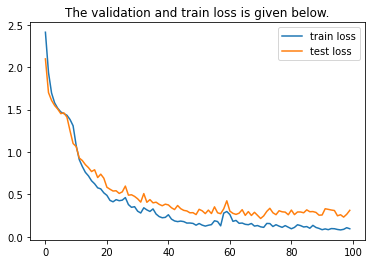

************************************************************************************************************************ 



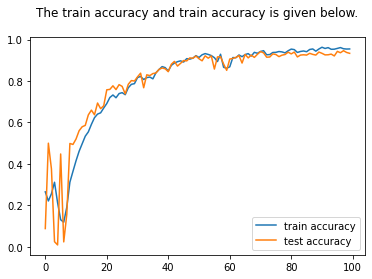

In [64]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss is given below.')
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy is given below.\n')
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

The Image is given below and the exact image is ModerateDemented


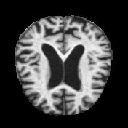

1/1 [==============================] - 0s 25ms/step

The Prediction Of The Image Is Moderate Demented 

************************************************************************************************************************ 


The Image is given below and the exact image is ModerateDemented


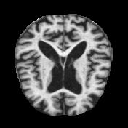

1/1 [==============================] - 0s 18ms/step

The Prediction Of The Image Is Moderate Demented 

************************************************************************************************************************ 


The Image is given below and the exact image is MildDemented


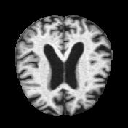

1/1 [==============================] - 0s 18ms/step

The Prediction Of The Image Is Mild Demented 

************************************************************************************************************************ 




In [96]:
class Alzheimer_disease:

  def __init__(self, image):
    self.image = image
  
  def prediction(self):
    ##### Load the image #####
    Image_ = image.load_img(self.image, target_size = (128, 128))
    ##### Convert to the NumPy array #####
    Image_ = image.img_to_array(Image_)
    print('The Image is given below and the exact image is {}'.format(self.image.split('/')[-2]))
    cv2_imshow(Image_)
    Image_ = np.expand_dims(Image_, axis = 0)
    predict = model.predict(Image_)
    predict = np.argmax(predict, axis = 1)
    if predict[0] == 0:
      print('\nThe prediction of the image is Mild Demented'.title(),'\n')
    elif predict[0] == 1:
      print('\nThe prediction of the image is Moderate Demented'.title(),'\n')
    if predict[0] == 2:
      print('\nThe prediction of the image is Non Demented'.title(),'\n')
    if predict[0] == 3:
      print('\nThe prediction of the image is Very Mild Demented'.title(),'\n')
    
list_of_image_ = ['/content/Alzheimer_s _Dataset/ModerateDemented/27 (2).jpg',\
                  '/content/Alzheimer_s _Dataset/ModerateDemented/moderateDem40.jpg',\
                  '/content/Alzheimer_s _Dataset/MildDemented/26 (19).jpg']

for image_ in list_of_image_:
  Alzheimer_disease_ = Alzheimer_disease(image_)
  Alzheimer_disease_.prediction()
  print('*'*120,'\n\n')

In [84]:
##### Save the model for the further use #####
try:
  model.save('Alzheimer_disease.h5')
except Exception as e:
  print(e.with_traceback)
else:
  print('Model saved successfully.')

Model saved successfully.
